<a href="https://colab.research.google.com/github/vmatiasw/modelos_y_simulacion/blob/main/P6E6ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

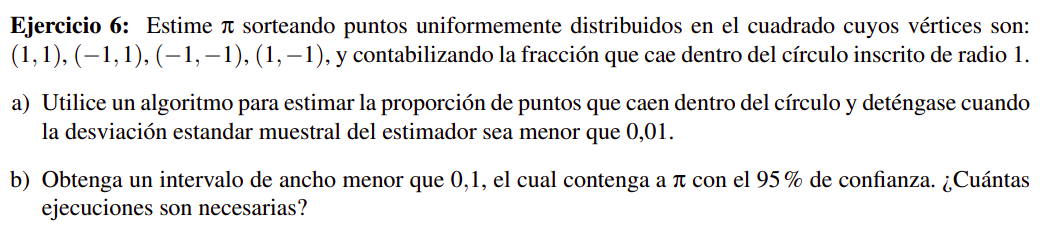

In [1]:
from random import random, seed
import numpy as np
from scipy import stats

def experimento_pi():
  x, y = random(), random()
  return (x**2 + y**2 < 1)*4


def estimar_media_muestral_con_error_estandar(error_estandar):
  media = experimento_pi()
  Scuad, n = 0, 1

  while n <= 100 or np.sqrt(Scuad / n) > error_estandar:
    n += 1
    muestra = experimento_pi()
    media_anterior = media

    media += (muestra - media_anterior) / n
    Scuad = Scuad * (1 - 1/(n-1)) + n*(media - media_anterior)**2

  return n, media, Scuad


seed(1)
n, media, Scuad = estimar_media_muestral_con_error_estandar(0.01)
print(f"n =        {n}")
print(f"media =    {media:.6f}")
print(f"Scuad =    {Scuad:.6f}")
print(f"pi:        {np.pi:.6f}")

n =        27115
media =    3.135239
Scuad =    2.711333
pi:        3.141593


In [6]:
def estimar_media_muestral_con_IC(long_interv, z_alpha_2):
  seed(1)
  error_estandar_maximo = long_interv / (2 * z_alpha_2)
  media = experimento_pi()
  Scuad, n = 0, 1
  intervalo = 0
  while n <= 100 or np.sqrt(Scuad/n) > error_estandar_maximo:
    n += 1
    muestra = experimento_pi()
    media_anterior = media

    media += (muestra - media_anterior) / n
    Scuad = Scuad * (1 - 1 /(n-1)) + n*(media - media_anterior)**2
    intervalo = (media - z_alpha_2*np.sqrt(Scuad / n), media + z_alpha_2*np.sqrt(Scuad / n))

  return n, media, Scuad, intervalo

confianza = 0.95
alpha = 1 - confianza
z_alpha_2 = abs(stats.norm.ppf(alpha/2))

long_interv = 0.1
seed(1)
n, media, Scuad, intervalo = estimar_media_muestral_con_IC(long_interv, z_alpha_2)
print(f"n =        {n}")
print(f"media =    {media:.6f}")
print(f"Scuad =    {Scuad:.6f}")
print(f"IC =       ({intervalo[0]:.6f}, {intervalo[1]:.6f})")
print(f"long. IC = {intervalo[1]-intervalo[0]:.6f}")
print(f"pi:        {np.pi:.6f}")

n =        4103
media =    3.153790
Scuad =    2.669419
IC =       (3.103797, 3.203783)
long. IC = 0.099985
pi:        3.141593


## curiosidad: pi pertenecera al intervalo el 95% de las veces?

In [32]:
def proporcion_pi_en_interv(n, confianza = 0.95, long_interv = 0.1):
  seed(1)

  alpha = 1 - confianza
  z_alpha_2 = abs(stats.norm.ppf(alpha/2))

  pi_en_interv = 0
  iter, media, Scuad, intervalo = 0, 0, 0, (0, 0)
  for _ in range(n):
    i, m, s2, interv = estimar_media_muestral_con_IC(long_interv, z_alpha_2)
    iter += i
    media += m
    Scuad += s2
    intervalo = (intervalo[0] + interv[0], intervalo[1] + interv[1])
    pi_en_interv += interv[0] <= np.pi <= interv[1]

  print(f"Experimento confianza {confianza * 100}% Y long. IC {long_interv}")
  print(f"Proporcion de veces en la que pi esta en el IC: {pi_en_interv/n:.6f}")
  print("Resultados promedio:")
  print(f"n =        {iter/n}")
  print(f"media =    {media/n:.6f}")
  print(f"Scuad =    {Scuad/n:.6f}")
  print(f"IC =       ({intervalo[0]/n:.6f}, {intervalo[1]/n:.6f})")


In [31]:
proporcion_pi_en_interv(1_000, confianza = 0.60, long_interv = 0.1)

Experimento confianza 60.0% Y long. IC 0.1
Proporcion de veces en la que pi esta en el IC: 0.000000
Resultados promedio:
n =        797.0
media =    3.091593
Scuad =    2.811952
IC =       (3.041603, 3.141584)


In [35]:
proporcion_pi_en_interv(1_000, confianza = 0.65, long_interv = 0.1)

Experimento confianza 65.0% Y long. IC 0.1
Proporcion de veces en la que pi esta en el IC: 1.000000
Resultados promedio:
n =        970.0
media =    3.109278
Scuad =    2.772360
IC =       (3.059314, 3.159243)


In [21]:
proporcion_pi_en_interv(1_000, confianza = 0.70, long_interv = 0.1)

Experimento confianza 70.0% Y long. IC 0.1
Proporcion de veces en la que pi esta en el IC: 1.000000
Resultados promedio:
n =        1164.0
media =    3.137457
Scuad =    2.708518
IC =       (3.087462, 3.187453)


In [18]:
proporcion_pi_en_interv(1_000, confianza = 0.80, long_interv = 0.1)

Experimento confianza 80.0% Y long. IC 0.1
Proporcion de veces en la que pi esta en el IC: 1.000000
Resultados promedio:
n =        1782.0
media =    3.135802
Scuad =    2.711474
IC =       (3.085812, 3.185793)


In [37]:
proporcion_pi_en_interv(1_000, confianza = 0.90, long_interv = 0.1)

Experimento confianza 90.0% Y long. IC 0.1
Proporcion de veces en la que pi esta en el IC: 1.000000
Resultados promedio:
n =        2907.0
media =    3.146887
Scuad =    2.685574
IC =       (3.096892, 3.196881)


In [16]:
proporcion_pi_en_interv(1_000, confianza = 0.95, long_interv = 0.1)

Experimento confianza 95.0% Y long. IC 0.1
Proporcion de veces en la que pi esta en el IC: 1.000000
Resultados promedio:
n =        4103.0
media =    3.153790
Scuad =    2.669419
IC =       (3.103797, 3.203783)
